# Kaylee Li

## Research Question/Interests

Spring in Vancouver is a great time for picnics, but instead of randomly choosing a park, why not use tree data to find the best spots? Trees offer shade, beauty, and a peaceful atmosphere, making them key to a good picnic experience. How can we use tree data to find the best picnic locations in Vancouver?

#### Main Research Question:
How can the Vancouver tree dataset help identify the best locations for spring picnics in Vancouver?

#### Sub Questions:
1. *Which neighbourhoods have the highest density of large trees that provide ample shade for picnic spots?* Large trees can significantly improve the picnic experience by offering shade, and identifying areas with a high density of these trees is key.
  
2. *Are there neighbourhoods with a high diversity of tree families that could provide more aesthetically varied picnic environments?* Neighbourhoods with a wider range of tree species could offer unique, visually appealing picnic spots. We’ll explore where this diversity is most prominent.

3. *Are there neighbourhoods with trees that produce high amounts of pollen, which could affect picnic experiences or accessibility for people with allergies?* Understanding pollen distribution will help people with allergies avoid certain areas or help plan allergy-friendly events.

#### Align with FINER criteria:

- Feasible: The Vancouver tree dataset provides the necessary information to identify ideal picnic spots, making the analysis practical and achievable. Additionally, I’ve been using API calls to gather related information about the trees based on their scientific names, which further enriches the dataset.
- Interesting: The research addresses a common desire for optimal picnic locations, especially with spring approaching, specifically for people in Vancouver. It also takes allergy concerns into account, making the project both engaging and valuable for the target audience.
- Novel: Using tree data to identify picnic spots is a unique approach, particularly with a focus on tree size, diversity, and pollen levels. I haven't found a map specific to Vancouver for picnics, which makes this research stand out and adds a fresh perspective.
- Ethical: The project relies on publicly available data, ensuring privacy is respected, while also considering public health by identifying allergy-friendly spaces for outdoor activities.
- Relevant: The research is highly relevant to urban planning, environmental science, and public health—fields that are becoming increasingly important in today’s cities.

In [4]:
import sys
sys.path.append("../../code")

import preprocess_query_family
import preprocess_query_pollen
import preprocess_change_col_type
import altair_data_transformer

from pygbif import species
import requests
from bs4 import BeautifulSoup
import json

import altair as alt
import pre_commit as pc
import pandas as pd

from toolz.curried import pipe
import os

In [5]:
data_dir = 'altairdata'
altair_data_transformer.setup_altair_for_large_data(data_dir)

In [6]:
import importlib
importlib.reload(preprocess_query_family)
importlib.reload(preprocess_query_pollen)
importlib.reload(preprocess_change_col_type)
importlib.reload(altair_data_transformer)

<module 'altair_data_transformer' from 'C:\\Users\\ljung\\Desktop\\git\\dsci320\\project-team_kbn\\analysis\\Picnic\\../../code\\altair_data_transformer.py'>

In [7]:
# raw dataframe
raw_df = pd.read_csv("../../data/raw/public-trees.csv", delimiter=";")

### Data Processing 

#### (i) Finding Respective Family Name (creating `FAMILY_NAME` column)

- One of my tasks was querying the respective family of the plants due to the large number of species.
- Family is a higher taxonomic rank, positioned above genus and species in the biological classification hierarchy.
- I've queried the respective family based on the genus name from Global Biodiversity Information Facility (GBIF) database (https://www.gbif.org/) using their GBIF API.
- The respective family is then stored into `FAMILY_NAME` column.

In [8]:
# this find and creates a dictionary:key mapping for all the unique genus based on GBIF database
# This step takes a while, so the result is saved to a file for future use.
# Uncomment the following lines to regenerate the dictionary and save it.

# genus_to_family_dict = preprocess_query_family.get_genus_to_family_mapping(raw_df)

# Save the dictionary to a json file for efficiency
# with open("../../data/processed/genus_to_family_dict.json", "w") as file:
#     json.dump(genus_to_family_dict, file, indent=4)

In [9]:
# load the dictionary:key mapping back into a dictionary
with open("../../data/processed/genus_to_family_dict.json", "r") as file:
    genus_to_family_dict = json.load(file)

In [10]:
# This maps the genus to its respective family using the genus-to-family dictionary
df_with_family = preprocess_query_family.map_family_to_dataframe(raw_df, genus_to_family_dict)

In [11]:
# this binds the "FAMILY_NAME" column to `../../data/processed/public_trees_cleaned.csv` based on TREE_ID (bc tree ID is unique)
# done like this because im not the only one doing data processing and let other teammate also use this column as well

preprocess_query_family.add_family_name_to_cleaned("../../data/processed/public_trees_cleaned.csv", df_with_family)

FAMILY_NAME already exists. Overwriting the column.
FAMILY_NAME added/overwritten in CSV.


#### (ii) Finding if Tree has Pollen or Not (creating `HAS_POLLEN` column)

- One of my own question is wonder if there neighbourhood with trees that produce high amount of pollen, and to do that, I need to know which tree species has pollen to begin with.
- Pollen production was determined by checking if the tree's scientific name (genus + species) exists in the Palynological Database (PalDat) (https://www.paldat.org/), a comprehensive resource for pollen data.
- The logic was implemented to return True if the tree's scientific name was found in the PalDat database (indicating pollen production) and False otherwise.
- Web scraping was used to extract and match pollen-related data from PalDat with the tree species in my dataset.
- The respective pollen status is then stored into `HAS_POLLEN` column.

In [12]:
# this find and create a list of trees that produce pollen according to PalDat database 
# This step takes a while, so the result is saved to a file for future use.
# Uncomment the following lines to regenerate the list and save it.

# tree_that_has_pollen_list = preprocess_query_pollen.search_species_list(raw_df)

# Save the list to a text file for efficiency
# with open("data/processed/tree_that_has_pollen_list.txt", "w") as file:
#     for item in tree_that_has_pollen_list:
#         file.write(f"{item}\n")

In [13]:
# read the tree_that_has_pollen_list.txt back into a list 

with open("../../data/processed/tree_that_has_pollen_list.txt", "r") as file:
    tree_that_has_pollen_list = [line.strip() for line in file]

In [14]:
# Map the `HAS_POLLEN` column to the dataframe using the list of pollen-producing trees

df_with_has_pollen = preprocess_query_pollen.map_has_pollen_to_dataframe(raw_df, tree_that_has_pollen_list)

In [15]:
# this binds the "HAS_POLLEN" column to `../../data/processed/public_trees_cleaned.csv` based on TREE_ID (bc tree ID is unique)
# done like this because im not the only one doing data processing and let other teammate also use this column as well

preprocess_query_pollen.add_has_pollen_to_cleaned("../../data/processed/public_trees_cleaned.csv", df_with_has_pollen)

HAS_POLLEN already exists. Replacing the column.
HAS_POLLEN replaced in the CSV.


#### (iii) Other preprocess + Cleaning done by Teammate


In [16]:
# insert text here.

## EDA

Read in the pre-processed dataframe and reformat it to ensure the columns have the correct data types.

In [17]:
processed_df = pd.read_csv("../../data/processed/public_trees_cleaned.csv")

# covert column to respective column type
processed_df = preprocess_change_col_type.convert_column_types(processed_df)

#### (i) Large Tree Height Distribution (Shade for Picnic Spots)

To identify areas with dense, large trees that can provide shade for picnic spots, we will analyze tree size and distribution.

In [18]:
# Filter for tall trees, those taller than 40 feet

large_tree_ranges = ['40-50', '50-60', '60-70', '70-80', '80-90', '>90']
filtered_large_trees = processed_df[processed_df['HEIGHT_RANGE'].isin(large_tree_ranges)]

# Create the chart for large tree density by neighbourhood
large_tree_density = alt.Chart(filtered_large_trees).mark_bar().encode(
    x=alt.X('NEIGHBOURHOOD_NAME:N', sort='-y', title="Neighbourhood Name", axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('count():Q', title="Number of Large Trees"),
    color=alt.Color('HEIGHT_RANGE:N', title="Height Range (in Feet)", legend=alt.Legend(title="Height Range")),
    tooltip=['NEIGHBOURHOOD_NAME:N', 'count():Q', 'HEIGHT_RANGE:N']
).properties(
    width=600, 
    height=400, 
    title={
        "text": "Distribution of Large Trees (Height > 40 Feet) by Neighbourhood",
    }
).configure_legend(
    titleFontSize=12,
    labelFontSize=10
)

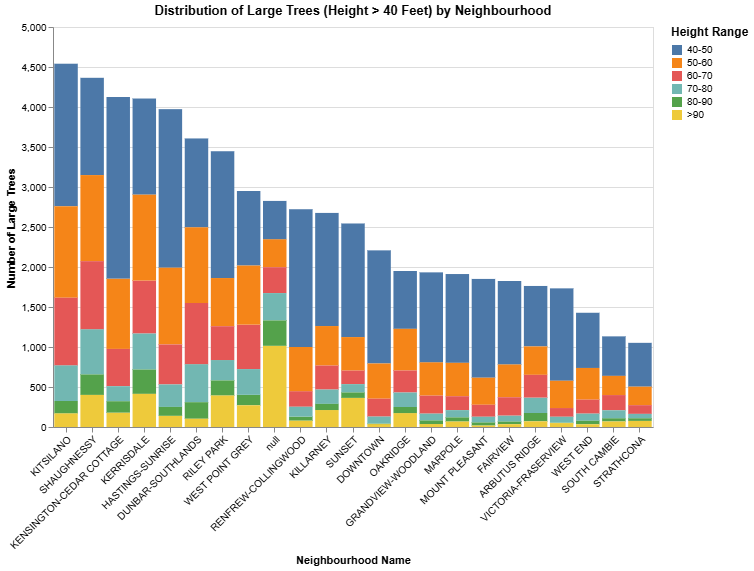

In [19]:
large_tree_density

#### Insight from the figure:
- Kitsilano has the highest number of large trees, making it potentially the most optimal area for a picnic.
- The significant presence of large trees labeled as "Null" suggests that many trees are not assigned to specific neighborhoods, possibly due to data collection issues or missing information. Investigating and properly labeling these "Null" entries could improve understanding of tree distribution and support urban planning and environmental management.
- It is surprising that Strathcona has the lowest number of large trees, despite containing parks like MacLean Park and Strathcona Park. This could indicate a higher proportion of open ground or local factors affecting tree growth in the area.

#### (ii) Tree Family Distribution (Tree Diversity in Vancouver)

To identify the 

In [20]:
family_chart = alt.Chart(processed_df).mark_bar().encode(
    alt.X('FAMILY_NAME:N', sort='-y', title='Tree Family', axis=alt.Axis(labelAngle=-45)),
    alt.Y('count():Q', 
          scale=alt.Scale(type='log'),
          title='Number of Trees'),
    alt.Color('FAMILY_NAME:N', legend=None),
    alt.Tooltip(['FAMILY_NAME:N', 'count():Q'])
).properties(
    title='Distribution of Tree Families in Vancouver'
).configure_axisX(
    labelAngle=90
).configure_axisY(
    grid=False,
    tickCount=5,
    tickSize=10
).configure_view(
    stroke=None
).configure_mark(
    opacity=0.8
)

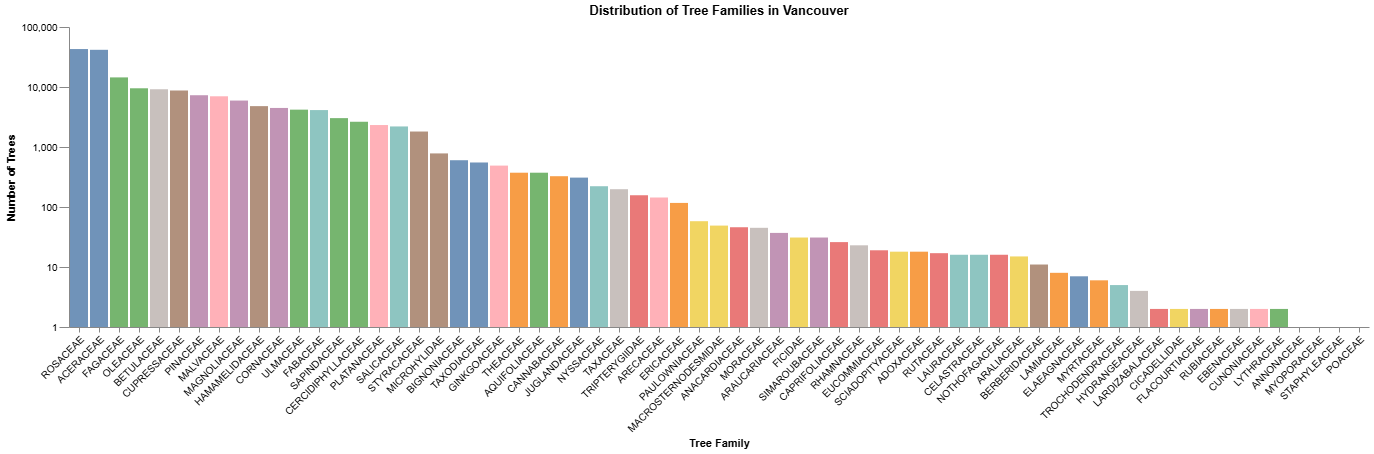

In [21]:
family_chart

#### Insight from the figure:
- 

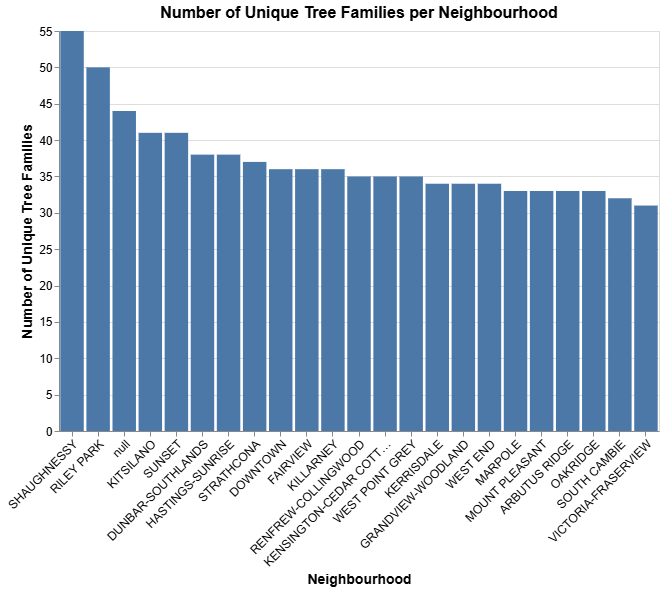

In [24]:
unique_trees_per_neighbourhood = alt.Chart(processed_df).mark_bar().encode(
    alt.X('NEIGHBOURHOOD_NAME:N', 
          title='Neighbourhood', 
          axis=alt.Axis(labelAngle=-45), 
          sort='-y'), 
    alt.Y('distinct(FAMILY_NAME):Q', title='Number of Unique Tree Families'),  
    alt.Tooltip(['NEIGHBOURHOOD_NAME:N', 'distinct(FAMILY_NAME):Q'])  
).properties(
    title='Number of Unique Tree Families per Neighbourhood', 
    width=600,  # Set chart width
    height=400  # Set chart height
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    anchor='middle',  # Center the title
    fontSize=16
).interactive()  # Make the chart interactive

unique_trees_per_neighbourhood

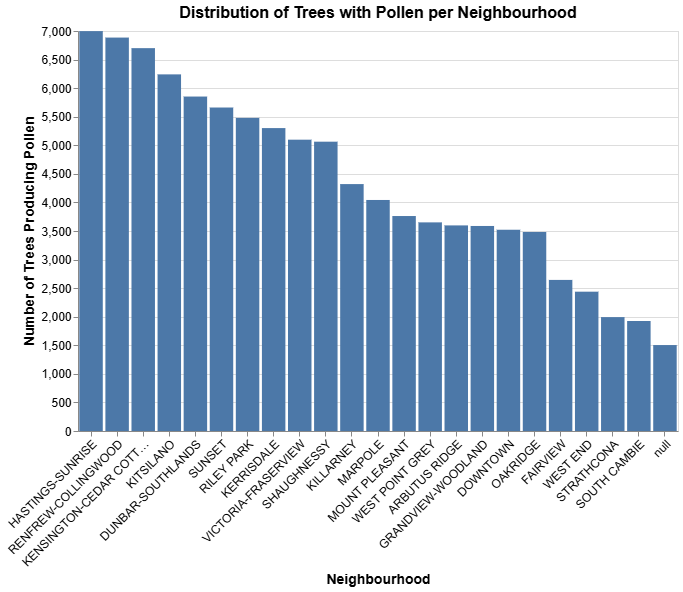

In [25]:
pollen_distribution = alt.Chart(processed_df[processed_df['HAS_POLLEN'] == True]).mark_bar().encode(
    alt.X('NEIGHBOURHOOD_NAME:N', title='Neighbourhood', axis=alt.Axis(labelAngle=-45), sort='-y'),
    alt.Y('count():Q', title='Number of Trees Producing Pollen'),
    alt.Tooltip(['NEIGHBOURHOOD_NAME:N', 'count():Q'])
).properties(
    title='Distribution of Trees with Pollen per Neighbourhood',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    anchor='middle',
    fontSize=16
).interactive()

pollen_distribution


In [26]:
pollen_map = alt.Chart(processed_df[processed_df['HAS_POLLEN'] == True]).mark_circle(size=30).encode(
    longitude='LONGITUDE:Q',
    latitude='LATITUDE:Q',
    color='NEIGHBOURHOOD_NAME:N',
    tooltip=['NEIGHBOURHOOD_NAME:N', 'LATITUDE:Q', 'LONGITUDE:Q']
).properties(
    title='Map of Trees Producing Pollen',
    width=600,
    height=400
).configure_title(
    anchor='middle',
    fontSize=16
)

pollen_map
